## Generate synthetic images using VAE

Based on https://towardsdatascience.com/building-a-convolutional-vae-in-pytorch-a0f54c947f71

Robert Martí (robert.marti@udg.edu)

July 2022

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np
import random
from torchvision.datasets import ImageFolder

from VAE import VAE # from the current folder

Load previously trained model 

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print (device)

cuda


In [4]:
#torch.save(net, "testVAE.pth")


In [3]:
model_name = "testVAE_mammo.pth"

In [4]:
# model = VAE()
model = torch.load(model_name)
print(model)

VAE(
  (encConv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (encConv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (encFC1): Linear(in_features=460800, out_features=256, bias=True)
  (encFC2): Linear(in_features=460800, out_features=256, bias=True)
  (decFC1): Linear(in_features=256, out_features=460800, bias=True)
  (decConv1): ConvTranspose2d(32, 16, kernel_size=(5, 5), stride=(1, 1))
  (decConv2): ConvTranspose2d(16, 1, kernel_size=(5, 5), stride=(1, 1))
)


In [5]:
model.eval()

VAE(
  (encConv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (encConv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (encFC1): Linear(in_features=460800, out_features=256, bias=True)
  (encFC2): Linear(in_features=460800, out_features=256, bias=True)
  (decFC1): Linear(in_features=256, out_features=460800, bias=True)
  (decConv1): ConvTranspose2d(32, 16, kernel_size=(5, 5), stride=(1, 1))
  (decConv2): ConvTranspose2d(16, 1, kernel_size=(5, 5), stride=(1, 1))
)

Generating a new image

In [9]:
path = "/mnt/mia_images/breast/iceberg_selection2/HOLOGIC/roi"
transform=transforms.Compose([transforms.Resize(size=(128, 128)),
    transforms.Grayscale(num_output_channels=1),transforms.ToTensor()])
dataset = ImageFolder(root=path, transform=transform)   
n = len(dataset)  # total number of examples
n_test = int(0.1 * n)  # take ~10% for test
test_set = torch.utils.data.Subset(dataset, range(n_test))  # take first 10%
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=True)
        
        

In [23]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.ToTensor()),
    batch_size=1)

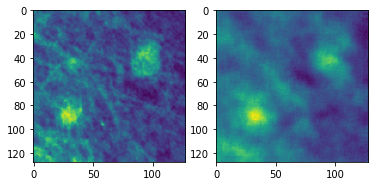

In [18]:
"""
The following part takes a random image from test loader to feed into the VAE.
Both the original image and generated image from the distribution are shown.
"""
with torch.no_grad():
    for data in random.sample(list(test_loader), 1):
        imgs, _ = data
        imgs = imgs.to(device)
        img = np.transpose(imgs[0].cpu().numpy(), [1,2,0])
        plt.subplot(121)
        plt.imshow(np.squeeze(img))
        out, mu, logVAR = model(imgs)
        outimg = np.transpose(out[0].cpu().numpy(), [1,2,0])
        plt.subplot(122)
        plt.imshow(np.squeeze(outimg))
        break